In [22]:
import pandas as pd

# Step 1: Load the dataset
file_path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'  # your local path
df = pd.read_csv(file_path)

# Step 2: Ensure Material is string type
df['Material'] = df['Material'].astype(str)

# Step 3: Filter for Material 507924
material_507924 = df[df['Material'].str.strip() == '507924']

# Step 4: Reshape to Time Series (Month → Demand)
# Drop unnecessary columns
drop_cols = ['Material', 'Description', 'Range', 'Subcat']
material_507924_ts = material_507924.drop(columns=drop_cols)

# Step 5: Transpose (flip rows and columns)
material_507924_ts = material_507924_ts.transpose()

# Step 6: Clean the index (remove "Actual" and extra spaces)
material_507924_ts.index = material_507924_ts.index.str.replace('Actual', '', regex=False)
material_507924_ts.index = material_507924_ts.index.str.strip()

# Step 7: Reset index and rename columns
material_507924_ts = material_507924_ts.reset_index()
material_507924_ts.columns = ['Month', 'Demand']

# Step 8: Convert 'Month' into datetime
# Step 8: Convert 'Month' into datetime and set it to Month-End
material_507924_ts['Month'] = pd.to_datetime(material_507924_ts['Month'], format='%b %y')
material_507924_ts['Month'] = material_507924_ts['Month'] + pd.offsets.MonthEnd(0)

# Step 9: Final time series ready
print(material_507924_ts)


# (Optional) Set Month as index if needed
# material_507924_ts = material_507924_ts.set_index('Month')


        Month  Demand
0  2021-04-30   11441
1  2021-05-31    8876
2  2021-06-30   28731
3  2021-07-31   12286
4  2021-08-31   60893
5  2021-09-30   29014
6  2021-10-31   20771
7  2021-11-30   16348
8  2021-12-31   17182
9  2022-01-31   15331
10 2022-02-28   14155
11 2022-03-31   33727
12 2022-04-30   37731
13 2022-05-31   14255
14 2022-06-30   24271
15 2022-07-31   17899
16 2022-08-31   17478
17 2022-09-30   16263
18 2022-10-31   12658
19 2022-11-30   23305
20 2022-12-31   30449
21 2023-01-31   10775
22 2023-02-28   23548
23 2023-03-31   11694
24 2023-04-30   15575
25 2023-05-31   25665
26 2023-06-30   26313
27 2023-07-31   14859
28 2023-08-31   19193
29 2023-09-30   23261
30 2023-10-31   10424
31 2023-11-30   16051



🔵 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   32 non-null     datetime64[ns]
 1   Demand  32 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 644.0 bytes
None

🟢 First 5 Rows:
       Month  Demand
0 2021-04-30   11441
1 2021-05-31    8876
2 2021-06-30   28731
3 2021-07-31   12286
4 2021-08-31   60893

🟣 Summary Statistics:
                     Month        Demand
count                   32     32.000000
mean   2022-08-15 07:30:00  20638.187500
min    2021-04-30 00:00:00   8876.000000
25%    2021-12-23 06:00:00  14230.000000
50%    2022-08-15 12:00:00  17330.000000
75%    2023-04-07 12:00:00  24619.500000
max    2023-11-30 00:00:00  60893.000000
std                    NaN  10328.567744

🟠 Missing Values:
Month     0
Demand    0
dtype: int64


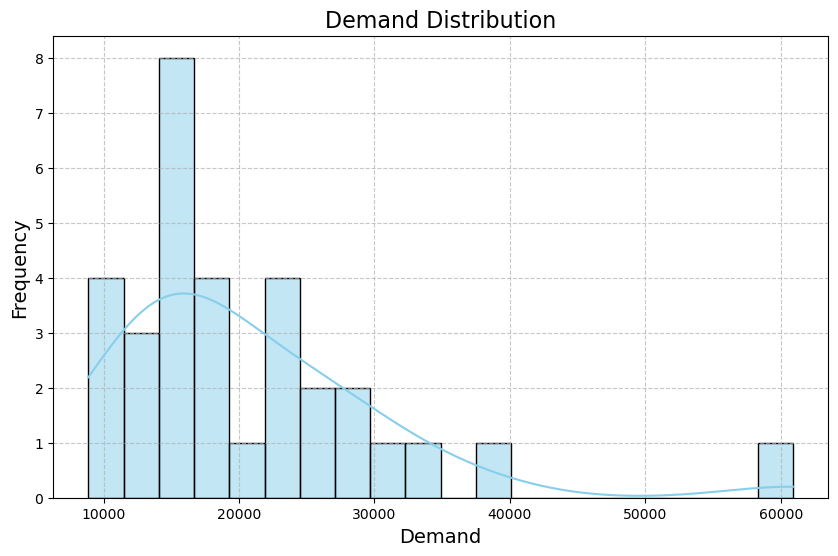

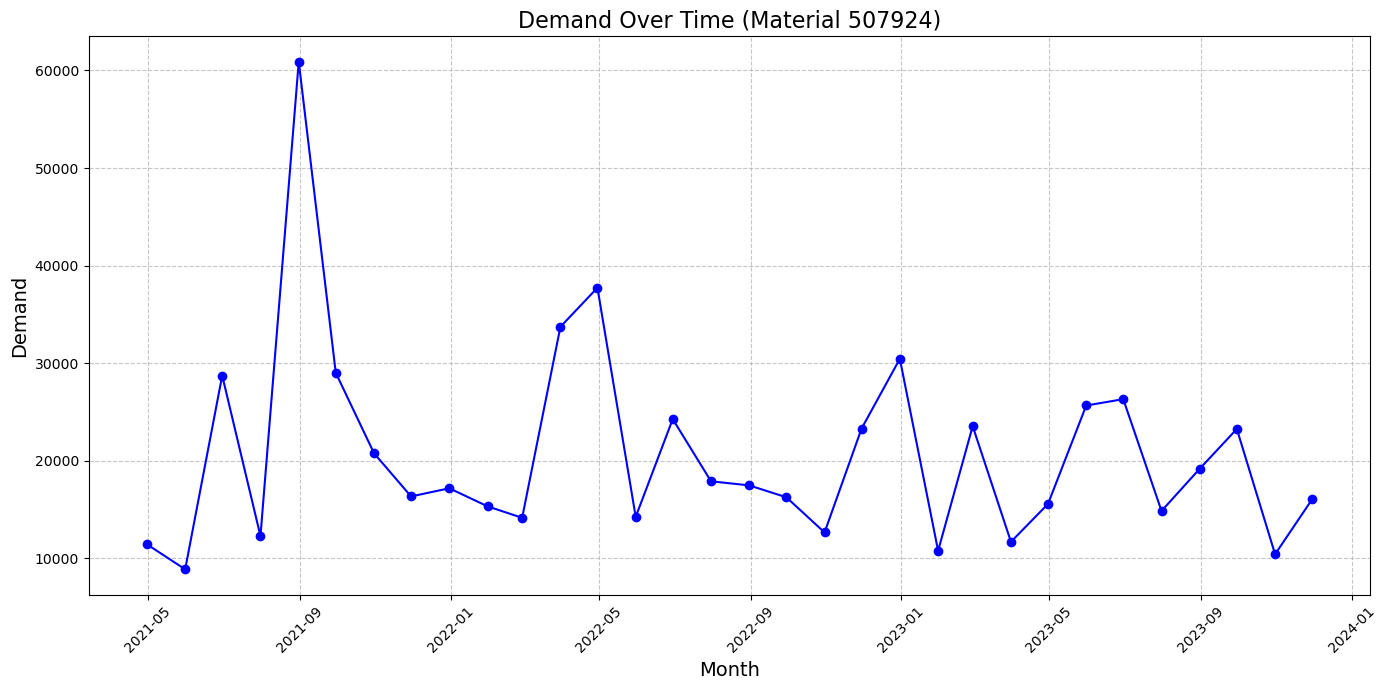

C:\Users\satyarth\AppData\Local\Temp\ipykernel_32200\3402608372.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month_Num', y='Demand', data=material_507924_ts, palette='coolwarm')


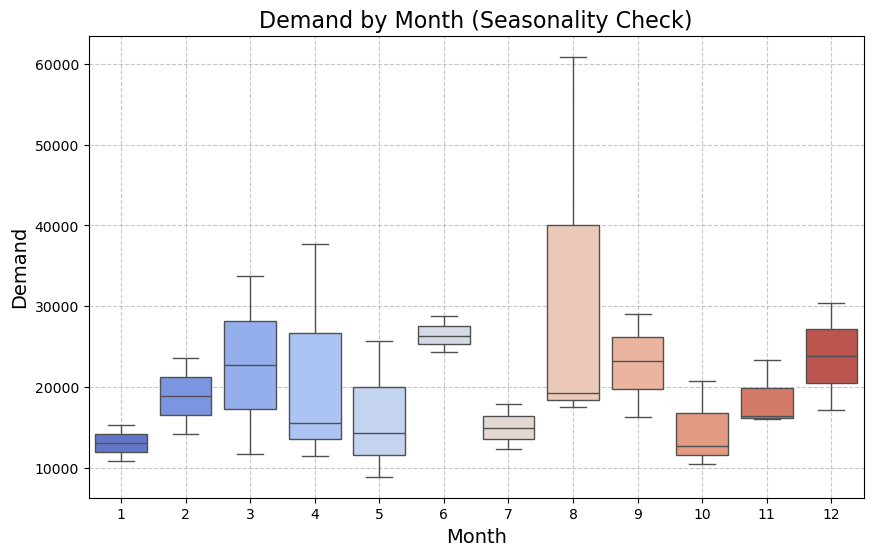


🔴 Outlier Detection:
Number of Outliers Detected: 1
       Month  Demand  Month_Num
4 2021-08-31   60893          8


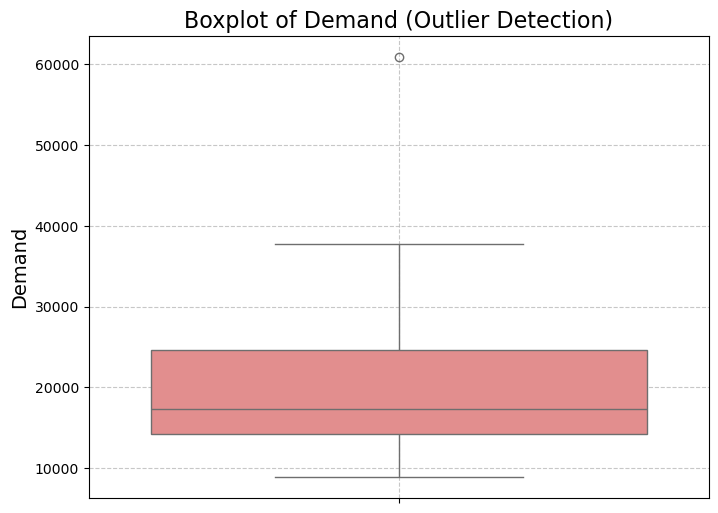

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load your prepared dataset ---
# (Assuming material_507924_ts is already created)

# Step 1: Basic Info
print("\n🔵 Basic Information:")
print(material_507924_ts.info())

print("\n🟢 First 5 Rows:")
print(material_507924_ts.head())

print("\n🟣 Summary Statistics:")
print(material_507924_ts.describe())

# Step 2: Check for missing values
print("\n🟠 Missing Values:")
print(material_507924_ts.isnull().sum())

# Step 3: Demand Distribution
plt.figure(figsize=(10,6))
sns.histplot(material_507924_ts['Demand'], bins=20, kde=True, color='skyblue')
plt.title('Demand Distribution', fontsize=16)
plt.xlabel('Demand', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Step 4: Time Series Plot
plt.figure(figsize=(14,7))
plt.plot(material_507924_ts['Month'], material_507924_ts['Demand'], marker='o', color='blue')
plt.title('Demand Over Time (Material 507924)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Boxplot (Monthly Seasonality)
material_507924_ts['Month_Num'] = material_507924_ts['Month'].dt.month
plt.figure(figsize=(10,6))
sns.boxplot(x='Month_Num', y='Demand', data=material_507924_ts, palette='coolwarm')
plt.title('Demand by Month (Seasonality Check)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Step 6: Outlier Detection (IQR Method)
print("\n🔴 Outlier Detection:")

Q1 = material_507924_ts['Demand'].quantile(0.25)
Q3 = material_507924_ts['Demand'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = material_507924_ts[(material_507924_ts['Demand'] < lower_bound) | (material_507924_ts['Demand'] > upper_bound)]

print(f"Number of Outliers Detected: {outliers.shape[0]}")
print(outliers)

# Visualize Outliers with Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y=material_507924_ts['Demand'], color='lightcoral')
plt.title('Boxplot of Demand (Outlier Detection)', fontsize=16)
plt.ylabel('Demand', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



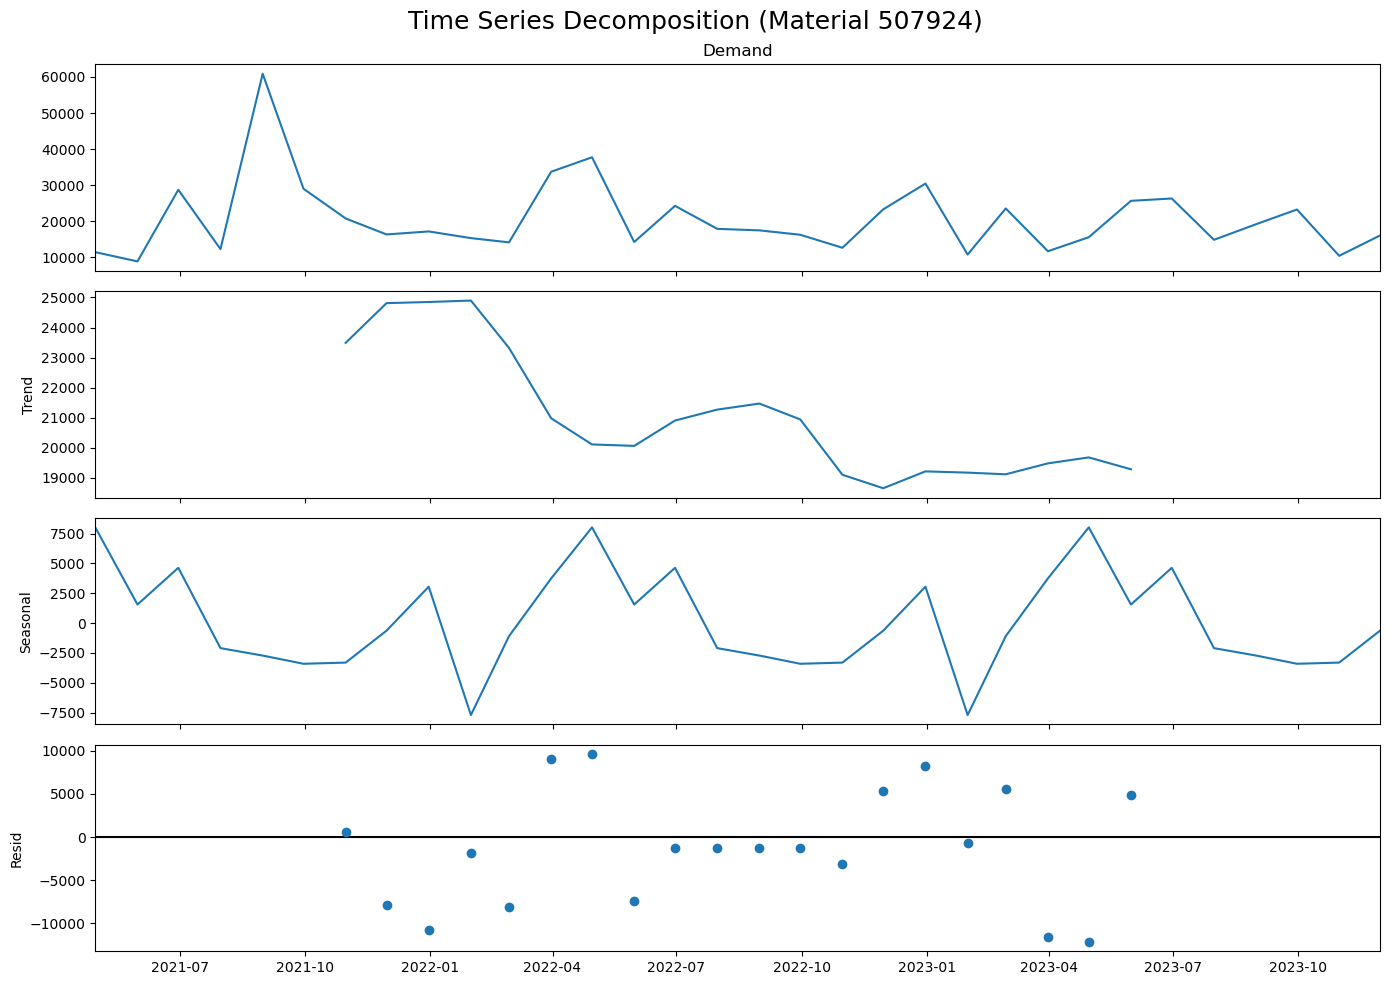

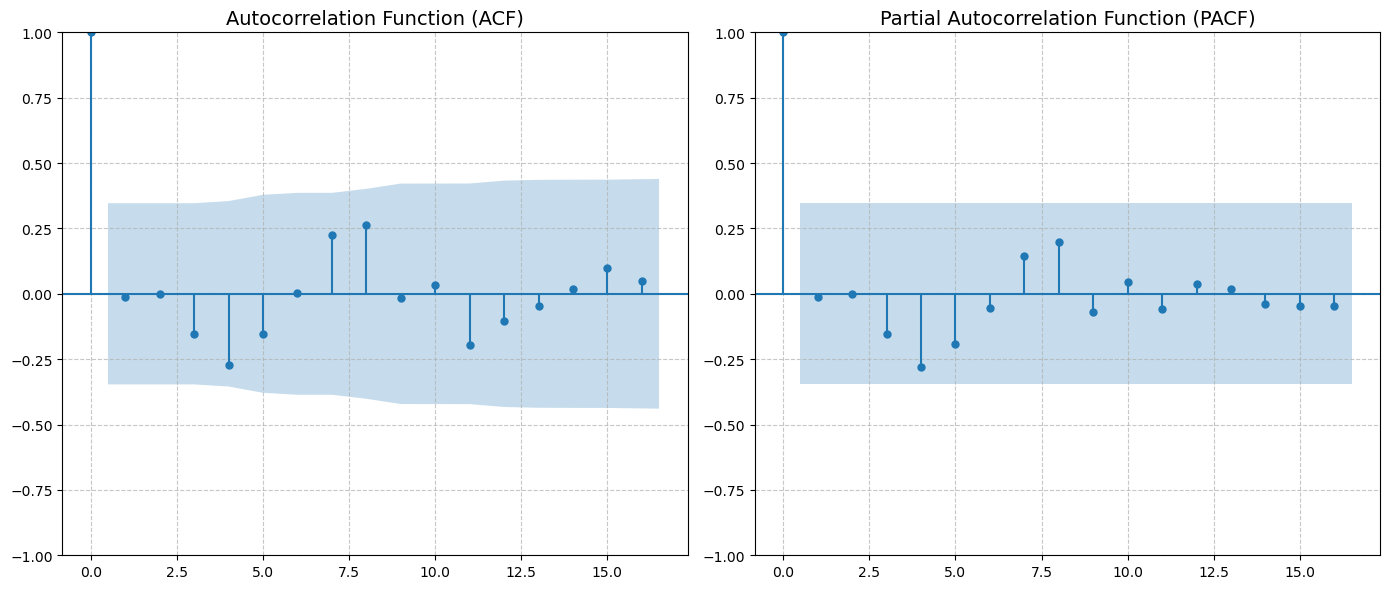

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Assuming material_507924_ts is already ready ---

# Step 1: Set 'Month' as index
material_507924_ts = material_507924_ts.set_index('Month')

# Step 2: Perform decomposition
result = seasonal_decompose(material_507924_ts['Demand'], model='additive', period=12)

# Step 3: Plot decomposition
fig = result.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Time Series Decomposition (Material 507924)', fontsize=18)
plt.tight_layout()
plt.show()

# Step 4: Drop missing values before ACF/PACF
demand_series = material_507924_ts['Demand'].dropna()

# Step 5: Dynamically adjust lags
max_lags = min(40, len(demand_series) // 2)

# Step 6: Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(demand_series, lags=max_lags, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plot_pacf(demand_series, lags=max_lags, method='ywm', ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [25]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Apply ADF test
result_adf = adfuller(material_507924_ts['Demand'])

# Step 2: Extract and print results
print('ADF Test Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Number of Lags Used:', result_adf[2])
print('Number of Observations Used:', result_adf[3])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value:.3f}')

# Step 3: Conclusion
if result_adf[1] <= 0.05:
    print("\n✅ The series is likely stationary (reject H0).")
else:
    print("\n❌ The series is likely non-stationary (fail to reject H0).")


ADF Test Statistic: -1.3865733304065344
p-value: 0.5886958380198885
Number of Lags Used: 7
Number of Observations Used: 24
Critical Values:
   1%: -3.738
   5%: -2.992
   10%: -2.636

❌ The series is likely non-stationary (fail to reject H0).


In [26]:
# Step 1: First-order differencing
material_507924_ts_diff = material_507924_ts['Demand'].diff().dropna()

# Step 2: Plot differenced series (optional to visualize)
import matplotlib.pyplot as plt

# Step 3: ADF Test on differenced series
from statsmodels.tsa.stattools import adfuller

result_adf_diff = adfuller(material_507924_ts_diff)

print('ADF Test Statistic (After Differencing):', result_adf_diff[0])
print('p-value:', result_adf_diff[1])
print('Number of Lags Used:', result_adf_diff[2])
print('Number of Observations Used:', result_adf_diff[3])
print('Critical Values:')
for key, value in result_adf_diff[4].items():
    print(f'   {key}: {value:.3f}')

# Step 4: Conclusion
if result_adf_diff[1] <= 0.05:
    print("\n The differenced series is stationary (good for ARIMA modeling).")
else:
    print("\n The differenced series is still non-stationary (may need further transformation).")


ADF Test Statistic (After Differencing): -6.004057825524999
p-value: 1.6313818064698405e-07
Number of Lags Used: 6
Number of Observations Used: 24
Critical Values:
   1%: -3.738
   5%: -2.992
   10%: -2.636

 The differenced series is stationary (good for ARIMA modeling).


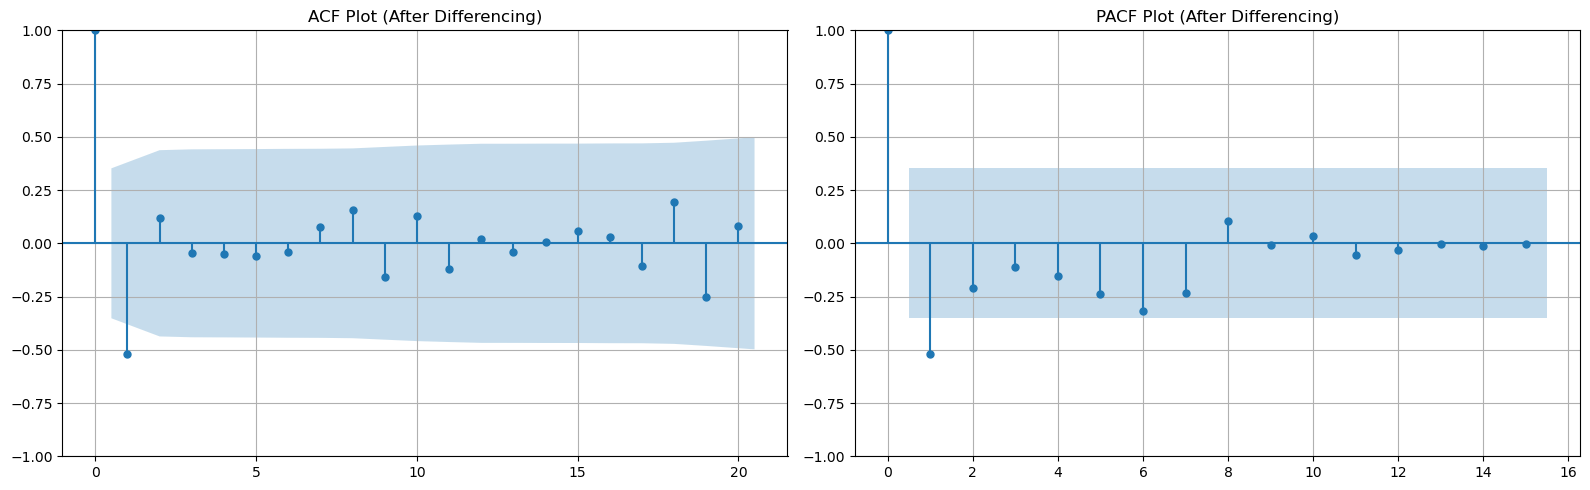

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF and PACF Plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ACF plot
plot_acf(material_507924_ts_diff, lags=20, ax=axes[0], title='ACF Plot (After Differencing)')
axes[0].grid(True)

# PACF plot
plot_pacf(material_507924_ts_diff, lags=15, ax=axes[1], method='ywm', title='PACF Plot (After Differencing)')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [39]:
# --- Stationarity Check ---
material_507924_ts_diff = material_507924_ts['Demand'].diff().dropna()

from statsmodels.tsa.stattools import adfuller
result_adf_diff = adfuller(material_507924_ts_diff)

print('ADF Test Statistic (After Differencing):', result_adf_diff[0])
print('p-value:', result_adf_diff[1])

if result_adf_diff[1] <= 0.05:
    print("\n✅ Differenced series is stationary, proceed with ARIMA (d=1)")
else:
    print("\n⚠️ Still non-stationary, consider further differencing.")

# --- Train-Test Split ---
material_507924_ts = material_507924_ts.sort_index()

train = material_507924_ts.loc[:'2023-07-01']
test = material_507924_ts.loc['2023-08-01':'2023-11-01']

print(f"\nTrain shape: {train.shape}")
print(f"Test shape: {test.shape}")

print("\nTrain Data:")
print(train.tail())

print("\nTest Data:")
print(test)

# --- Summary ---
# Use original 'Demand' for model training
# But inside ARIMA model, set d=1 (since differencing made stationary)


ADF Test Statistic (After Differencing): -6.004057825524999
p-value: 1.6313818064698405e-07

✅ Differenced series is stationary, proceed with ARIMA (d=1)

Train shape: (27, 2)
Test shape: (3, 2)

Train Data:
            Demand  Month_Num
Month                        
2023-02-28   23548          2
2023-03-31   11694          3
2023-04-30   15575          4
2023-05-31   25665          5
2023-06-30   26313          6

Test Data:
            Demand  Month_Num
Month                        
2023-08-31   19193          8
2023-09-30   23261          9
2023-10-31   10424         10


In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

# Step 1: Set p, d, q
# (Based on ACF/PACF you saw earlier, assume starting values (p=1, d=1, q=1))
order = (1, 1, 1)

# Step 2: Train ARIMA model on Train Set
model = ARIMA(train['Demand'], order=order)
model_fit = model.fit()

# Step 3: Forecast on Test Set (next 4 months)
forecast_test = model_fit.forecast(steps=len(test))

# Step 4: Calculate MAPE on Test Set
mape_arima = mean_absolute_percentage_error(test['Demand'], forecast_test) * 100
print(f" MAPE on Test Set (ARIMA): {mape_arima:.2f}%")

# Step 5: Retrain ARIMA on full data for future forecast
final_model = ARIMA(material_507924_ts['Demand'], order=order)
final_model_fit = final_model.fit()

# Step 6: Forecast next 3 months (Dec 2023 - Feb 2024)
forecast_index = pd.date_range(start='2023-12-01', periods=3, freq='MS')
forecast_future = final_model_fit.forecast(steps=3)
forecast_future = pd.Series(forecast_future.values, index=forecast_index)

# Step 7: Display Forecast
print("\nForecast for next 3 months (Dec 2023 - Feb 2024):")
print(forecast_future.round(2))


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


 MAPE on Test Set (ARIMA): 39.42%

Forecast for next 3 months (Dec 2023 - Feb 2024):
2023-12-01    19668.71
2024-01-01    19938.22
2024-02-01    19958.29
Freq: MS, dtype: float64


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Set SARIMA order
# (p,d,q) x (P,D,Q,s)
# Assume: (1,1,1) x (1,1,1,12)  — yearly seasonality (s=12 for months)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Step 2: Train SARIMA model on Train Set
sarima_model = SARIMAX(train['Demand'], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit(disp=False)

# Step 3: Forecast on Test Set
forecast_sarima_test = sarima_model_fit.forecast(steps=len(test))

# Step 4: Calculate MAPE on Test Set
mape_sarima = mean_absolute_percentage_error(test['Demand'], forecast_sarima_test) * 100
print(f" MAPE on Test Set (SARIMA): {mape_sarima:.2f}%")

# Step 5: Retrain SARIMA on full data
sarima_final_model = SARIMAX(material_507924_ts['Demand'], order=order, seasonal_order=seasonal_order)
sarima_final_fit = sarima_final_model.fit(disp=False)

# Step 6: Forecast next 3 months (Dec 2023 - Feb 2024)
forecast_sarima_future = sarima_final_fit.forecast(steps=3)
forecast_sarima_future = pd.Series(forecast_sarima_future.values, index=forecast_index)

# Step 7: Display Forecast
print("\n📈 Forecast for next 3 months (SARIMA Model):")
print(forecast_sarima_future.round(2))


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


 MAPE on Test Set (SARIMA): 145.81%


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



📈 Forecast for next 3 months (SARIMA Model):
2023-12-01    15226.89
2024-01-01    10849.95
2024-02-01    12548.74
Freq: MS, dtype: float64


In [31]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Prepare data
train_prophet = train.reset_index().rename(columns={'Month': 'ds', 'Demand': 'y'})
test_prophet = test.reset_index().rename(columns={'Month': 'ds', 'Demand': 'y'})

# Step 2: Train Prophet model
model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model_prophet.fit(train_prophet)

# Step 3: Predict on test set
future_test = test_prophet[['ds']]  # Prophet needs a dataframe with 'ds'
forecast_test = model_prophet.predict(future_test)

# Step 4: Calculate MAPE
mape_prophet = mean_absolute_percentage_error(test_prophet['y'], forecast_test['yhat']) * 100
print(f" MAPE on Test Set (Prophet): {mape_prophet:.2f}%")

# Step 5: Retrain on full data and Forecast future 3 months
full_data_prophet = material_507924_ts.reset_index().rename(columns={'Month': 'ds', 'Demand': 'y'})
final_model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
final_model_prophet.fit(full_data_prophet)

# Future 3 months
future_dates = final_model_prophet.make_future_dataframe(periods=3, freq='MS')
forecast_future = final_model_prophet.predict(future_dates)

# Extract only the forecast part
forecast_next3 = forecast_future.set_index('ds').loc['2023-12-01':'2024-02-01', 'yhat']

print("\n Forecast for Next 3 Months (Dec 2023 - Feb 2024):")
print(forecast_next3.round(2))


00:07:56 - cmdstanpy - INFO - Chain [1] start processing
00:07:57 - cmdstanpy - INFO - Chain [1] done processing


 MAPE on Test Set (Prophet): 71.53%


00:07:57 - cmdstanpy - INFO - Chain [1] start processing
00:07:57 - cmdstanpy - INFO - Chain [1] done processing



 Forecast for Next 3 Months (Dec 2023 - Feb 2024):
ds
2023-12-01     8457.08
2024-01-01   -13017.79
2024-02-01    25017.11
Name: yhat, dtype: float64


In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Fit MA model (q=1, d=1 because already differenced earlier)
model_ma = ARIMA(train['Demand'], order=(0,1,1))
model_ma_fit = model_ma.fit()

# Step 2: Predict for test period
forecast_test_ma = model_ma_fit.forecast(steps=len(test))

# Step 3: Calculate MAPE
mape_ma = mean_absolute_percentage_error(test['Demand'], forecast_test_ma) * 100
print(f" MAPE on Test Set (MA Model): {mape_ma:.2f}%")

# Step 4: Retrain on full data
final_model_ma = ARIMA(material_507924_ts['Demand'], order=(0,1,1))
final_model_ma_fit = final_model_ma.fit()

# Step 5: Forecast next 3 months
forecast_next3_ma = final_model_ma_fit.forecast(steps=3)
forecast_next3_ma.index = pd.date_range(start='2023-12-01', periods=3, freq='MS')

print("\n Forecast for Next 3 Months (Dec 2023 - Feb 2024):")
print(forecast_next3_ma.round(2))


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


 MAPE on Test Set (MA Model): 38.80%

 Forecast for Next 3 Months (Dec 2023 - Feb 2024):
2023-12-01    20018.4
2024-01-01    20018.4
2024-02-01    20018.4
Freq: MS, Name: predicted_mean, dtype: float64


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Fit SARIMAX model
# Let's assume non-seasonal order (p,d,q) = (1,1,1)
# and seasonal order (P,D,Q,s) = (1,1,1,12) because monthly seasonality
model_sarimax = SARIMAX(train['Demand'], 
                        order=(1,1,1), 
                        seasonal_order=(1,1,1,12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
model_sarimax_fit = model_sarimax.fit()

# Step 2: Predict for test period
forecast_test_sarimax = model_sarimax_fit.forecast(steps=len(test))

# Step 3: Calculate MAPE
mape_sarimax = mean_absolute_percentage_error(test['Demand'], forecast_test_sarimax) * 100
print(f" MAPE on Test Set (SARIMAX): {mape_sarimax:.2f}%")

# Step 4: Retrain on full data
final_model_sarimax = SARIMAX(material_507924_ts['Demand'],
                              order=(1,1,1),
                              seasonal_order=(1,1,1,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
final_model_sarimax_fit = final_model_sarimax.fit()

# Step 5: Forecast next 3 months
forecast_next3_sarimax = final_model_sarimax_fit.forecast(steps=3)
forecast_next3_sarimax.index = pd.date_range(start='2023-12-01', periods=3, freq='MS')

print("\n Forecast for Next 3 Months (Dec 2023 - Feb 2024):")
print(forecast_next3_sarimax.round(2))


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


 MAPE on Test Set (SARIMAX): 34.86%


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



 Forecast for Next 3 Months (Dec 2023 - Feb 2024):
2023-12-01    28216.85
2024-01-01     9333.15
2024-02-01    20637.54
Freq: MS, Name: predicted_mean, dtype: float64


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Fit ARIMAX model (without exog, same as ARIMA)
model_arimax = SARIMAX(train['Demand'],
                       order=(1,1,1),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
model_arimax_fit = model_arimax.fit()

# Step 2: Predict for test period
forecast_test_arimax = model_arimax_fit.forecast(steps=len(test))

# Step 3: Calculate MAPE
mape_arimax = mean_absolute_percentage_error(test['Demand'], forecast_test_arimax) * 100
print(f" MAPE on Test Set (ARIMAX): {mape_arimax:.2f}%")

# Step 4: Retrain on full data
final_model_arimax = SARIMAX(material_507924_ts['Demand'],
                             order=(1,1,1),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
final_model_arimax_fit = final_model_arimax.fit()

# Step 5: Forecast next 3 months
forecast_next3_arimax = final_model_arimax_fit.forecast(steps=3)
forecast_next3_arimax.index = pd.date_range(start='2023-12-01', periods=3, freq='MS')

print("\n Forecast for Next 3 Months (Dec 2023 - Feb 2024):")
print(forecast_next3_arimax.round(2))


 MAPE on Test Set (ARIMAX): 39.64%

 Forecast for Next 3 Months (Dec 2023 - Feb 2024):
2023-12-01    18364.14
2024-01-01    18758.61
2024-02-01    18825.88
Freq: MS, Name: predicted_mean, dtype: float64


c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\satyarth\anaconda3\envs\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


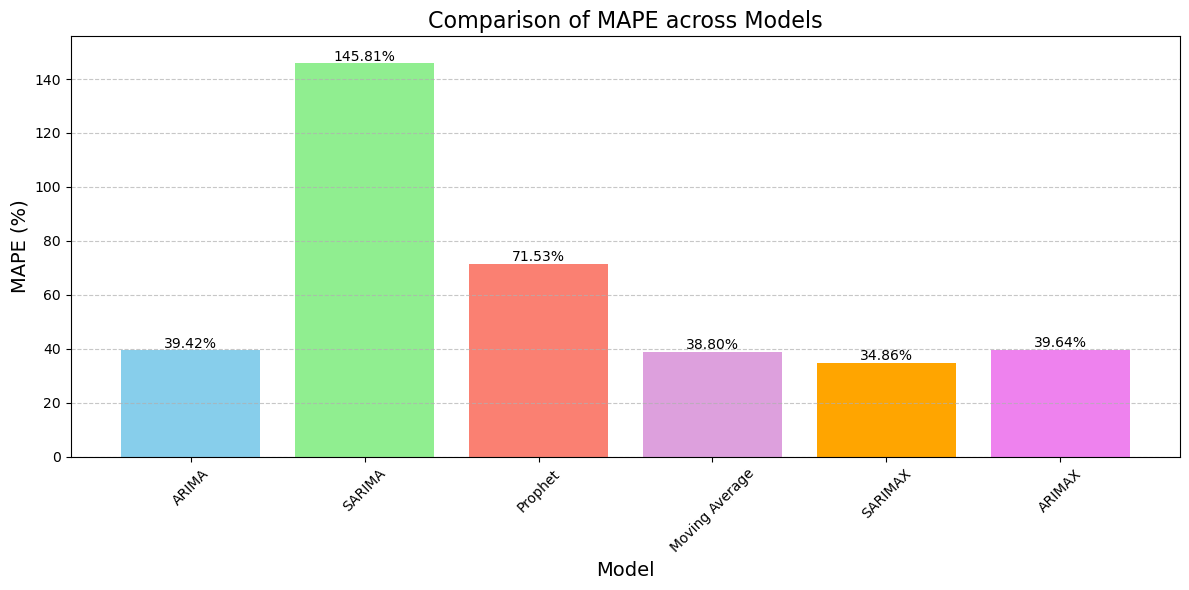

In [35]:
import matplotlib.pyplot as plt

# Step 1: Prepare data
models = ['ARIMA', 'SARIMA', 'Prophet', 'Moving Average', 'SARIMAX', 'ARIMAX']
mape_values = [mape_arima, mape_sarima, mape_prophet, mape_ma, mape_sarimax, mape_arimax]

# Step 2: Plot
plt.figure(figsize=(12,6))
bars = plt.bar(models, mape_values, color=['skyblue', 'lightgreen', 'salmon', 'plum', 'orange', 'violet'])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', fontsize=10)

# Styling
plt.title('Comparison of MAPE across Models', fontsize=16)
plt.ylabel('MAPE (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(mape_values) + 10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


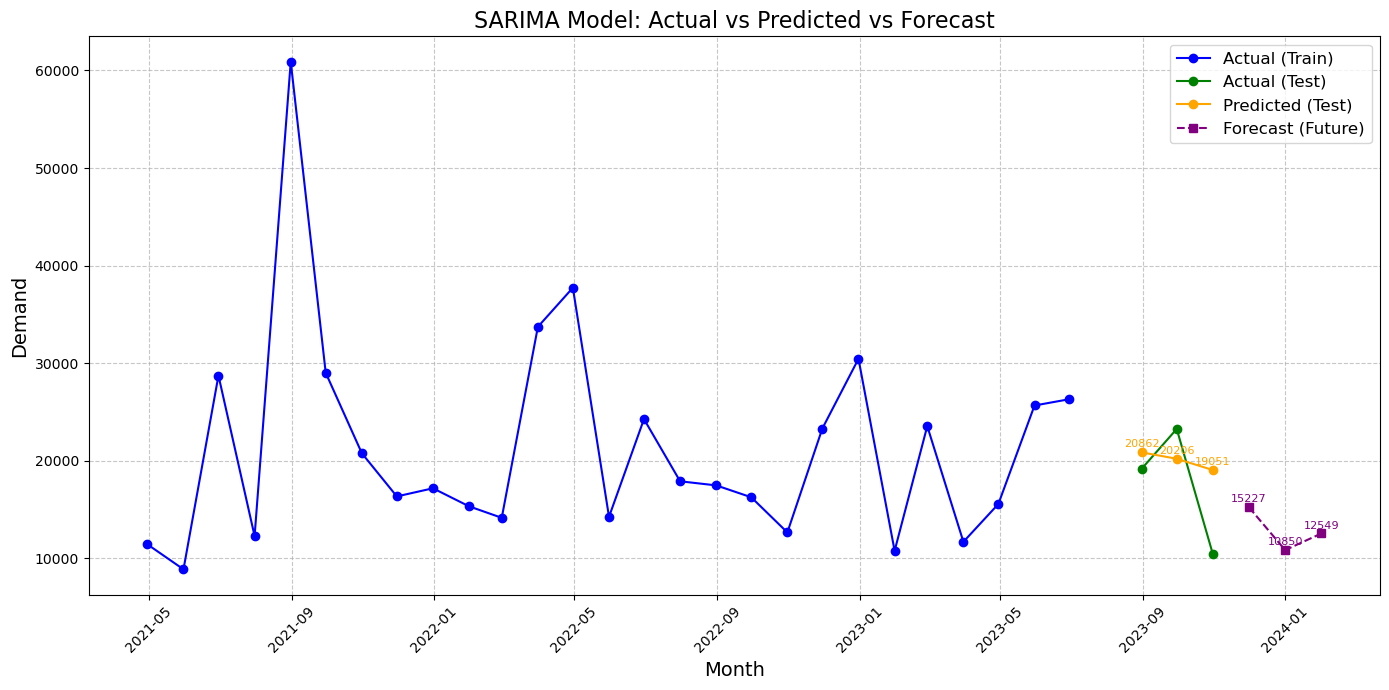

In [36]:
import matplotlib.pyplot as plt

# Step 1: Setup
# (assuming you already have these ready)
# - train['Demand']
# - test['Demand']
# - forecast_test_sarimax  → prediction for test set (4 months)
# - forecast_sarima_future → future forecast (next 3 months)

# Make sure forecast_test_sarimax is a Series aligned with test.index
predicted_test = pd.Series(forecast_test_sarimax.values, index=test.index)

# Step 2: Plot
plt.figure(figsize=(14,7))

# Actual Train
plt.plot(train.index, train['Demand'], label='Actual (Train)', color='blue', marker='o')

# Actual Test
plt.plot(test.index, test['Demand'], label='Actual (Test)', color='green', marker='o')

# Predicted Test
plt.plot(predicted_test.index, predicted_test.values, label='Predicted (Test)', color='orange', marker='o')

# Forecast Future
plt.plot(forecast_sarima_future.index, forecast_sarima_future.values, label='Forecast (Future)', color='purple', linestyle='--', marker='s')

# Step 3: Annotate Points
for x, y in zip(test.index, predicted_test.values):
    plt.text(x, y+500, f'{y:.0f}', ha='center', fontsize=8, color='orange')

for x, y in zip(forecast_sarima_future.index, forecast_sarima_future.values):
    plt.text(x, y+500, f'{y:.0f}', ha='center', fontsize=8, color='purple')

# Step 4: Styling
plt.title('SARIMA Model: Actual vs Predicted vs Forecast', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
